# CREDIT RISK ANALYSER

### Challenges in Loan Approval for Applicants with Limited Credit History:
Lending institutions often encounter difficulties when assessing loan applications from individuals with inadequate or non-existent credit histories. Unfortunately, some applicants exploit this situation by deliberately defaulting on their loans. The company aims to use <B>Exploratory Data Analysis (EDA)</B> <i>to scrutinize the data for patterns, ensuring that deserving applicants, with the capacity to repay their loans, are not unjustly declined.<BR><BR></i>

### Problem Statement
> <B><u>Balancing Loan Approval Decisions:</B></U> When the company receives a loan application, it must make a pivotal decision regarding loan approval. 
    This decision is associated with two distinct risks:<BR>
> <ul>
<LI><b>Risk of Non-Approval:</b> If the applicant is likely to repay the loan, declining their application results in a loss of potential business for the company.
<LI><b>Risk of Default:</b> On the other hand, if the applicant is not likely to repay the loan and is at risk of defaulting, approving the loan may lead to a financial loss for the company.</ul>
<hr>
<h3><b> Data Scenario Categorization:</b></h3>
<br>The provided dataset is categorized into two scenarios:
<ul>
<li><b>Clients with Payment Difficulties: </b>This group includes individuals who have a history of making late payments of more than X days on at least one of the first Y installments of the loan within our sample.
        <li><b>All Other Cases:</b> This category encompasses all other instances where loan payments are made on time.</ul>



   
**The objective of the analysis is to identify distinctive patterns and applicant characteristics that differentiate these two scenarios. This will enable the company to make more informed and equitable loan approval decisions, thereby mitigating the risk of financial loss while extending loans to deserving applicants.** 

In [1]:
# Importing the required libraries - NumPy, Pandas, Matplotlib and Seaborn

# Analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Extra
import warnings
warnings.filterwarnings(action='ignore')

## Part 1: Applications' Data Analysis for a Loan eligibility

### Reading and Inspection

**Import and read**

Import and read the `application_data.csv` database. Store the dataframe in a variable called `df`.

In [2]:
df=pd.read_csv('application_data.csv')

In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.shape

(307511, 122)

**Understanding the data:**

Let's take a look at the data for applications_data. There are 307511 rows and 122 columns. This information pertains to individuals who have submitted loan applications to the company.

In [5]:
df.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

Now let's get into understanding and analysing this data to get more insights out of it.


### Inspect for the presence of Missing values

In [6]:
# Checking for null values percentage
100 * df.isnull().mean()

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [7]:
# Checking for columns having null value percentage more than 40 and storing it in a variable named 'cols_to_drop'

cols_to_drop = df.columns[100 * df.isnull().mean() > 40]

In [8]:
cols_to_drop

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

In [9]:
# These columns are advised to drop from the dataframe for better analysis.

df= df.drop(cols_to_drop, axis = 1)

In [10]:
# Checking the dataframe again after dropping those columns
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df.shape

(307511, 73)

In [12]:
# Finding the remaining null values and sorting them to know the highest percentage column

# Set the maximum number of rows to be displayed to None, which means that all rows will be displayed
pd.options.display.max_rows = None 

(100 * df.isnull().mean()).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3 

In [13]:
# Finding the number of columns having null values
len(df.columns[100 * df.isnull().mean()>0])

18

#### Fill NaN values

I notice that 18 columns has some `NaN` values. Here, we inspect these columns which are required.

The client's occupation provides insights into their income stability, job security, earning potential, and overall financial situation. <br><br>

It is seen that `OCCUPATION_TYPE` has 31.35% of null values so it is safe to replace all the missing values with `not_known` in the column.

In [14]:
# Fill the null values in OCCUPATION_TYPE with 'not_known'
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna('not_known')

In [15]:
#Returns the count of missing (null) values in the 'OCCUPATION_TYPE' column
df['OCCUPATION_TYPE'].isnull().sum()

0

It is seen that `EXT_SOURCE_3` has 19.83% of null values. Plotting a histogram for checking the frequency of values.

<Axes: ylabel='Frequency'>

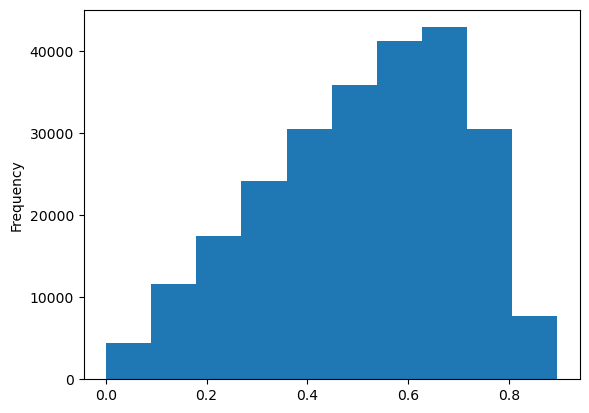

In [16]:
# Plot a Histogram
df['EXT_SOURCE_3'].plot.hist()

As it is seen, there are no outliers, so it is advised to impute the null values with the mean of the variable.

In [17]:
# Fill the null values in EXT_SOURCE_3 with mean
df['EXT_SOURCE_3'].fillna(df['EXT_SOURCE_3'].mean(), inplace=True)

In [18]:
#Returns the count of missing (null) values in the 'EXT_SOURCE_3' column
df['EXT_SOURCE_3'].isnull().sum()

0

Then the next six columns, have nearly the same percentage. 

`AMT_REQ_CREDIT_BUREAU_YEAR     13.501631`
`AMT_REQ_CREDIT_BUREAU_QRT      13.501631`
`AMT_REQ_CREDIT_BUREAU_MON      13.501631`
`AMT_REQ_CREDIT_BUREAU_WEEK     13.501631`
`AMT_REQ_CREDIT_BUREAU_DAY      13.501631`
`AMT_REQ_CREDIT_BUREAU_HOUR     13.501631`
<br><br>
I have compiled a list named `credit_counts` that includes all the mentioned columns to create histograms, aiming to identify any potential outliers.

In [19]:
#Storing these columns in a variable named credit_counts
credit_counts=['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_MON'
              ,'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR']

AMT_REQ_CREDIT_BUREAU_YEAR


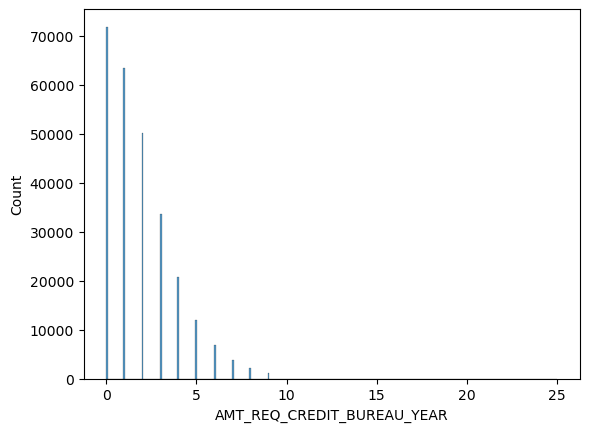

AMT_REQ_CREDIT_BUREAU_QRT


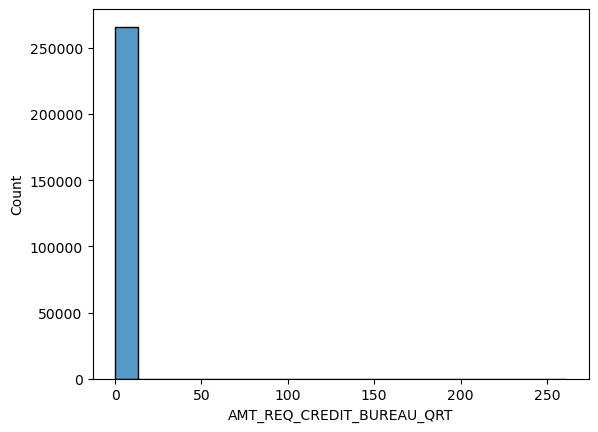

AMT_REQ_CREDIT_BUREAU_MON


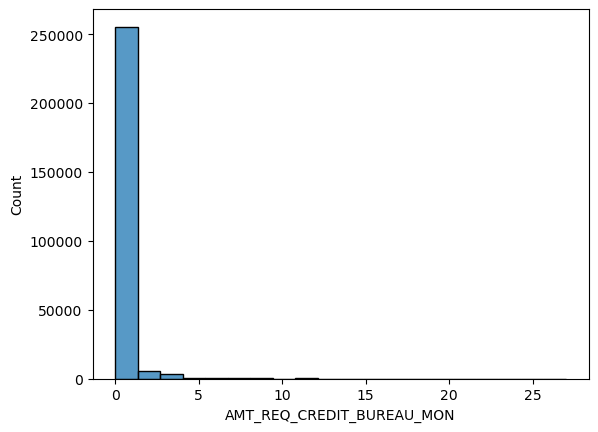

AMT_REQ_CREDIT_BUREAU_WEEK


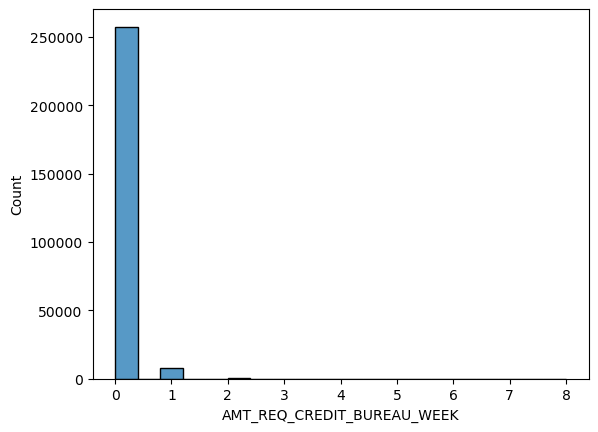

AMT_REQ_CREDIT_BUREAU_DAY


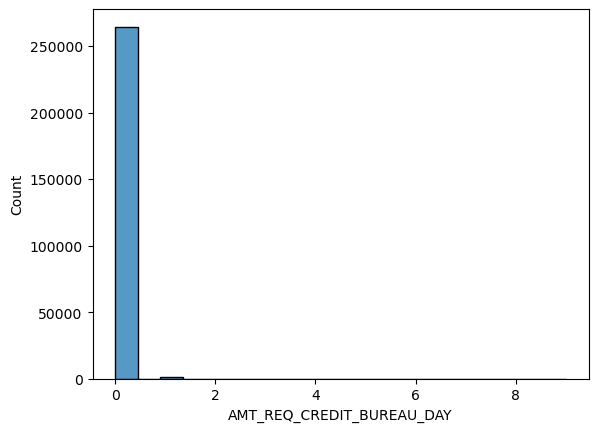

AMT_REQ_CREDIT_BUREAU_HOUR


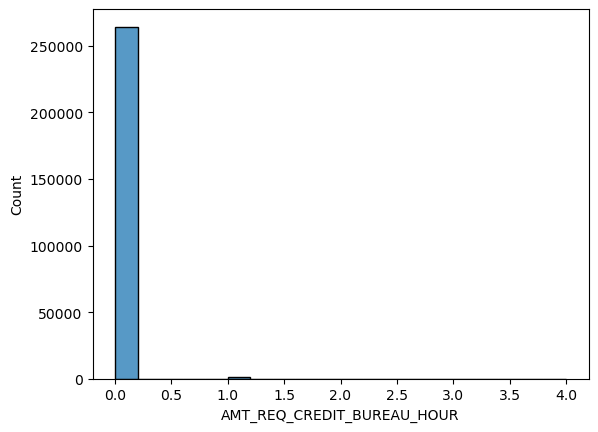

In [20]:
# Plot histograms for each of them to check for outliers
# Iterating through the loop
for i in credit_counts:
    print(i)
    sns.histplot(df[i])
    plt.show()

In the above graphs, we observe that all the columns are having outliers except for `AMT_REQ_CREDIT_BUREAU_QRT` column. So it is advised to repalce null values according to the statistics below:

`{'AMT_REQ_CREDIT_BUREAU_YEAR':median},'AMT_REQ_CREDIT_BUREAU_QRT':mean,
'AMT_REQ_CREDIT_BUREAU_MON':median,'AMT_REQ_CREDIT_BUREAU_WEEK':median,
AMT_REQ_CREDIT_BUREAU_DAY':medain,'AMT_REQ_CREDIT_BUREAU_HOUR':median}`
<br><br>
As `median` is least affected by outliers, I impute by median and without outliers, impute with `mean`.

In [21]:
# Fill the null values for the above columns with median and mean according to the outliers
df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(df['AMT_REQ_CREDIT_BUREAU_YEAR'].median(),inplace=True)
df['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(df['AMT_REQ_CREDIT_BUREAU_QRT'].mean(),inplace=True)
df['AMT_REQ_CREDIT_BUREAU_MON'].fillna(df['AMT_REQ_CREDIT_BUREAU_MON'].median(),inplace=True)
df['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(df['AMT_REQ_CREDIT_BUREAU_WEEK'].median(),inplace=True)
df['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(df['AMT_REQ_CREDIT_BUREAU_DAY'].median(),inplace=True)
df['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(df['AMT_REQ_CREDIT_BUREAU_HOUR'].median(),inplace=True)

Now, I look into the following columns:<br>
`NAME_TYPE_SUITE                 0.420148`
`OBS_30_CNT_SOCIAL_CIRCLE        0.332021`
`DEF_30_CNT_SOCIAL_CIRCLE        0.332021`
`OBS_60_CNT_SOCIAL_CIRCLE        0.332021`
`DEF_60_CNT_SOCIAL_CIRCLE        0.332021`    
`EXT_SOURCE_2                    0.214626`

It is observed that the above columns, have null values very closely related to each other. 

The `NAME_TYPE_SUITE` column is not considered important. While the presence of an accompanying individual could potentially provide some additional context, it is usually not a primary or decisive factor in assessing credit risk. Traditional credit risk assessment focuses on the financial information and credit history of the primary applicant to determine their ability and likelihood to repay the loan. We can retain the data as it is since it is not expected to have a significant impact on the analysis.


The next four columns give information about the <i><b>number of instances or observations where a client's social connections or network show a noticeable or observable pattern of defaulting on their payments</i></b>. <p>In a financial context, understanding the default behavior of a client's social connections can be valuable for assessing credit risk, as it may indicate shared financial traits or influences among the client's network.
So it is advised to remove the null values.

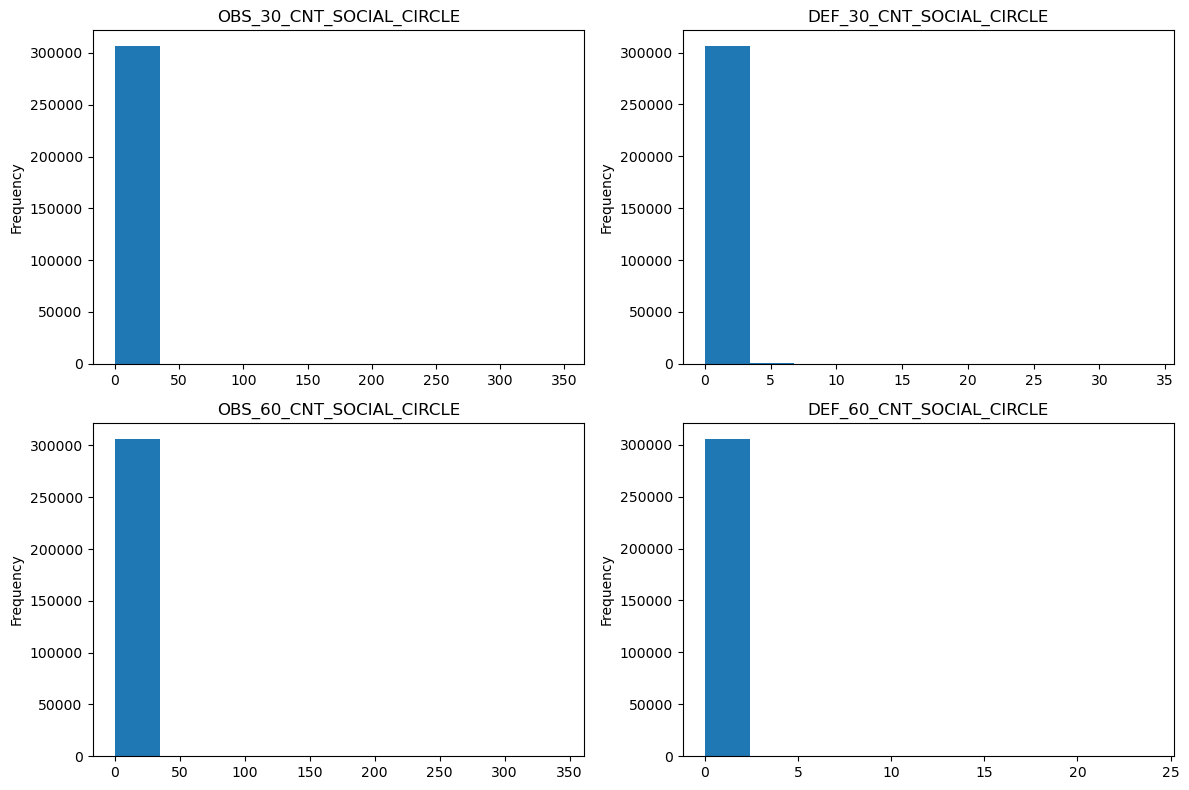

In [22]:
# Plotting histograms for each of them to check for outliers
# Create a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot histograms for the specified columns in each subplot
df['OBS_30_CNT_SOCIAL_CIRCLE'].plot.hist(ax=axes[0, 0], title='OBS_30_CNT_SOCIAL_CIRCLE')
df['DEF_30_CNT_SOCIAL_CIRCLE'].plot.hist(ax=axes[0, 1], title='DEF_30_CNT_SOCIAL_CIRCLE')
df['OBS_60_CNT_SOCIAL_CIRCLE'].plot.hist(ax=axes[1, 0], title='OBS_60_CNT_SOCIAL_CIRCLE')
df['DEF_60_CNT_SOCIAL_CIRCLE'].plot.hist(ax=axes[1, 1], title='DEF_60_CNT_SOCIAL_CIRCLE')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

As it seen `DEF_30_CNT_SOCIAL_CIRCLE` has an outlier, it is replaced with a median, while the remaining  with mean.

In [23]:
# Imputing the null values for the above columns
df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_30_CNT_SOCIAL_CIRCLE'].mean(),inplace=True)
df['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(df['DEF_30_CNT_SOCIAL_CIRCLE'].median(),inplace=True)
df['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_60_CNT_SOCIAL_CIRCLE'].mean(),inplace=True)
df['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(df['DEF_60_CNT_SOCIAL_CIRCLE'].mean(),inplace=True)

In [24]:
# Now final check for null values in the dataframe
(100 * df.isnull().mean()).sort_values(ascending=False)

NAME_TYPE_SUITE                0.420148
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
OBS_30_CNT_SOCIAL_CIRCLE       0.000000
FLAG_DOCUMENT_8                0.000000
FLAG_DOCUMENT_7                0.000000
FLAG_DOCUMENT_6                0.000000
FLAG_DOCUMENT_5                0.000000
FLAG_DOCUMENT_4                0.000000
EXT_SOURCE_3                   0.000000
FLAG_DOCUMENT_3                0.000000
DEF_30_CNT_SOCIAL_CIRCLE       0.000000
FLAG_DOCUMENT_10               0.000000
FLAG_DOCUMENT_2                0.000000
DEF_60_CNT_SOCIAL_CIRCLE       0.000000
OBS_60_CNT_SOCIAL_CIRCLE       0.000000
FLAG_DOCUMENT_9                0.000000
SK_ID_CURR                     0.000000
FLAG_DOCUMENT_11               0.000000
FLAG_DOCUMENT_20               0.000000
AMT_REQ_CREDIT_BUREAU_QRT      0.000000
AMT_REQ_CREDIT_BUREAU_MON      0.000000


The top five remaining columns with null values can be ignored since the null values are minimal, and they won't significantly impact the analysis.

In [25]:
#To get the number of distinct elements in each column.
df.nunique()

SK_ID_CURR                     307511
TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER                         3
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
CNT_CHILDREN                       15
AMT_INCOME_TOTAL                 2548
AMT_CREDIT                       5603
AMT_ANNUITY                     13672
AMT_GOODS_PRICE                  1002
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
REGION_POPULATION_RELATIVE         81
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_REGISTRATION               15688
DAYS_ID_PUBLISH                  6168
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL  

In [26]:
#This method returns a DataFrame containing summary statistics of the DataFrame.
#By default, it only includes numeric columns and provides the following statistics for each column.
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.005538,0.006055,0.029723,0.231293,0.265474,1.778463
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.078014,0.103037,0.190728,0.856810,0.738507,1.765523
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.265474,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


<h1><u><font color='blue'>Data imbalance</h1></u><br>


The `TARGET` variable typically refers to the variable that indicates whether a borrower is likely to default on their credit obligations or not. It is the variable that the model is trying to predict or classify. In other words, it is the outcome variable that determines whether a loan applicant is considered high-risk or low-risk in terms of creditworthiness.<br>
    <br>The `TARGET` variable is crucial for several reasons:
    
<ul>
<li> <b>Risk Assessment:</b> This variable directly informs the lender or financial institution about the risk associated with a loan applicant. A high-risk prediction means that the applicant is more likely to default on their credit obligations, while a low-risk prediction indicates a lower likelihood of default. This helps lenders make informed decisions about whether to approve or deny a loan application and under what terms (interest rate, credit limit, etc.).

<li><b>Portfolio Management:</b> For a lender, managing the overall risk in their loan portfolio is essential. This variable allows them to balance their portfolio by controlling the proportion of high-risk and low-risk borrowers. This helps to minimize potential losses and maintain a healthy financial position.</ul>


In [27]:
# Data imbalance
100 * df['TARGET'].value_counts(normalize = True)

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

A `Target` value of `1` is assigned to individuals who are unable to repay the loan called the <i><b>defaulters</i></b> and a `Target` value of `0` to those capable of repaying the loan.


## Creating distinct variables for various categories of columns.

In [28]:
# Numerical Columns having so many values
cont_cols=["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","DAYS_BIRTH",
           "DAYS_EMPLOYED","REGION_POPULATION_RELATIVE"]
           
#For segmented analysis, the dataframe is segmented based on the target variable
# 'payment_difficulties_data' for '1' and 'no_payment_difficulties_data' for '0'

no_payment_difficulties_data = df[df['TARGET']==0] 
payment_difficulties_data = df[df['TARGET']==1]


<h1 style="color:green"> Univariate Analysis

### Categorical Univariate Analysis

<b> 1. OCCUPATION_TYPE (Categorical):</b><br>
The client's occupation is a significant factor in assessing credit risk because it provides valuable insights into their financial stability and ability to meet loan obligations. Lenders use this information, among other factors, to make informed decisions about whether to extend credit and under what terms.
<br><br>

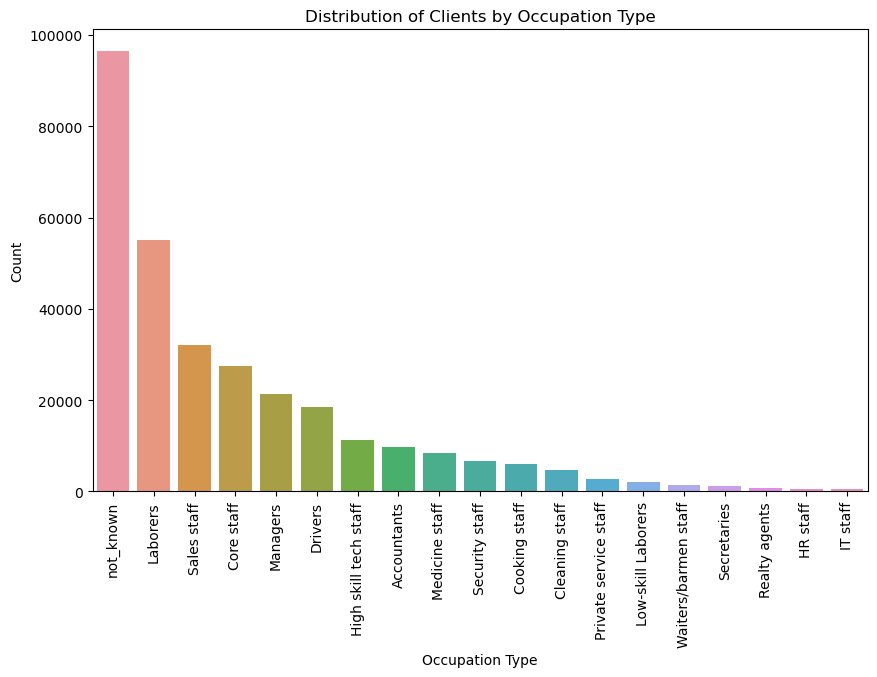

In [29]:
# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='OCCUPATION_TYPE', order=df['OCCUPATION_TYPE'].value_counts().index)
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.title('Distribution of Clients by Occupation Type')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)  

# Show the plot
plt.show()

#### <font style="color:blue">ANALYSIS - 
<font style="color:blue">In this code, we use Seaborn's countplot to directly plot the distribution of clients by occupation type.
This chart will help to visualize the distribution of clients with different occupations and check if certain occupations are more prone to payment difficulties. The analysis reveals that individuals with an occupation labeled as 'unknown' are more likely to experience payment difficulties.

<b> 2. NAME_EDUCATION_TYPE (Categorical):</b><br>

To analyze the educational background of clients.
This variable is valuable in various data analysis contexts, especially when assessing factor like credit risk. For example, it can be used to study the relationship between a client's education level and their ability to repay loans, with the assumption that individuals with higher education may have better financial prospects and lower credit risk. This information can be useful for financial lenders.

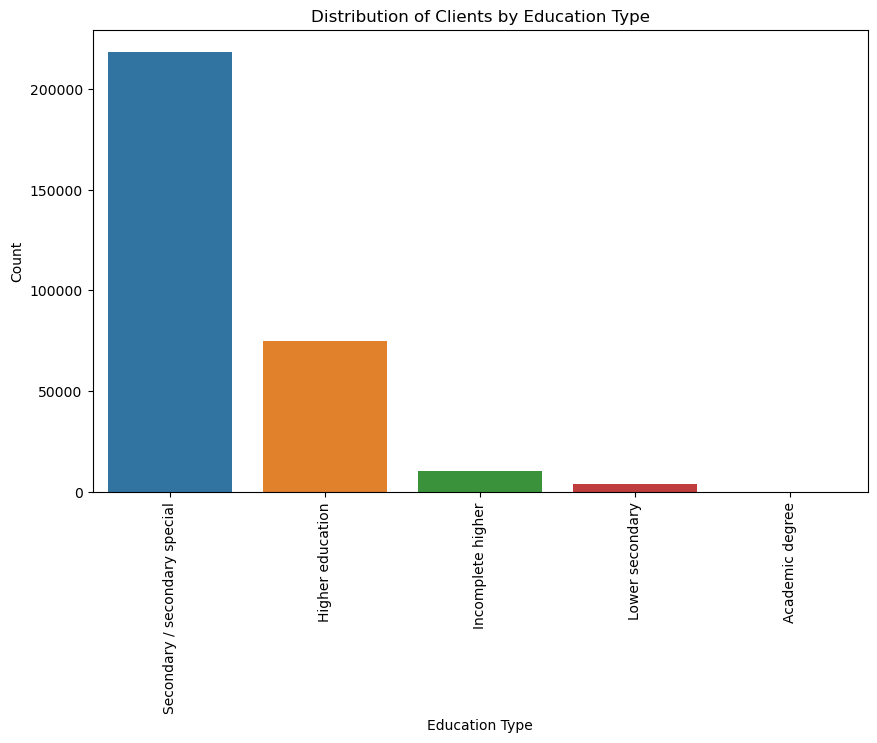

In [30]:
# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NAME_EDUCATION_TYPE', order=df['NAME_EDUCATION_TYPE'].value_counts().index)
plt.xlabel('Education Type')
plt.ylabel('Count')
plt.title('Distribution of Clients by Education Type')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)  

# Show the plot
plt.show()

#### <font style="color:blue">ANALYSIS - 
<font style="color:blue">This count plot will help you visualize the distribution of education types and determine if education level affects payment difficulties.From this dataset, it's evident that individuals applying for loans tend to have lower educational qualifications.

<b> 3. NAME_CONTRACT_TYPE (Categorical):</b><br>

To analyze the distribution of loan types (e.g., Cash loans, Revolving loans) among clients.
This variable involves analyzing the distribution of loan types, such as Cash loans and Revolving loans, among clients. 
<li>Analyzing the distribution of loan types, such as Cash loans and Revolving loans, among clients is a fundamental step in credit risk analysis.
<li> Revolving loans, which are typically credit card loans with revolving balances, may carry a higher risk due to the potential for revolving debt and high-interest rates. 
    <li>Cash loans, on the other hand, are typically installment loans with fixed terms, which may carry lower risk.
<li>The composition of loan types can influence lending decisions. For instance, if a large percentage of clients have high-risk Revolving loans, the lender may adjust lending criteria, interest rates, or credit limits to manage the associated risk.

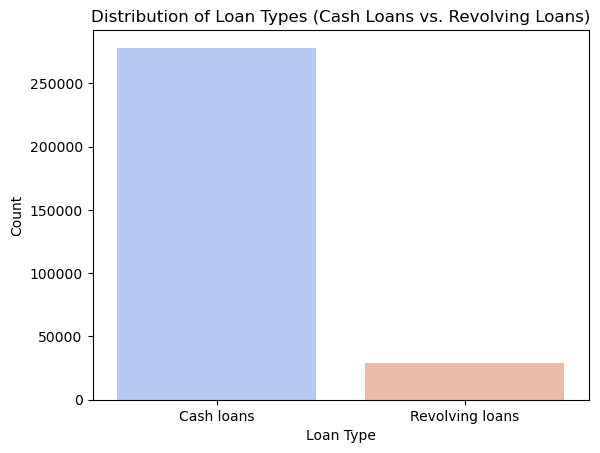

In [31]:
# Create a countplot to visualize the distribution of loan types
sns.countplot(data=df, x="NAME_CONTRACT_TYPE", palette="coolwarm")
plt.title("Distribution of Loan Types (Cash Loans vs. Revolving Loans)")
plt.xlabel("Loan Type")
plt.ylabel("Count")

# Show the plot
plt.show()

#### <font style="color:blue">ANALYSIS - 
<font style="color:blue"><ul> <li>The analysis of this distribution suggests that the majority of clients have **"Cash loans"**, while a smaller proportion have **"Revolving loans".** 
    <li>"Revolving loans," being a smaller segment, may warrant closer scrutiny due to their potential higher-risk nature.
    <li>Based on the analysis, lenders can develop tailored risk mitigation strategies for each loan type. This may include adjusting lending criteria, setting appropriate interest rates, and implementing risk management measures specific to the characteristics of each loan category.</ul>

### Numerical Univariate Analysis

<b>1. AMT_INCOME_TOTAL (Numerical):</b><br>
This variable refers to the total annual income or earnings of an individual or client. It encompasses all sources of income, such as salary, wages, bonuses, investments, rental income, and any other financial resources that contribute to the client's overall income.
Lenders use it to determine whether an applicant has the financial means to repay a loan. Generally, clients with higher incomes are considered lower credit risks because they have more capacity to meet their financial obligations.


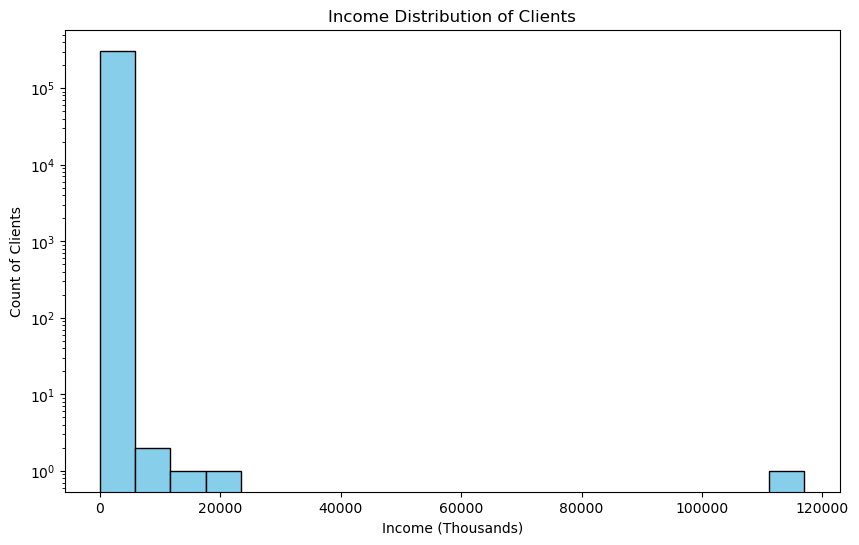

In [32]:
# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist((df['AMT_INCOME_TOTAL']/1000), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Income (Thousands)')
plt.ylabel('Count of Clients')
plt.title('Income Distribution of Clients')
plt.yscale('log')  # Used a logarithmic scale for better visualization

# Show the plot
plt.show()

#### <font style="color:blue">ANALYSIS - 
<font style="color:blue">This histogram allows you to analyze the income distribution of clients and check if higher income clients are less likely to have payment difficulties.The analysis of this data indicates that clients with higher incomes do not face challenges when it comes to repaying their loans.

<b>2. DAYS_EMPLOYED (Numerical):</b><br>
This variable represents the number of days before the loan application that a person started their current employment. It provides valuable information that can be used to assess an applicant's creditworthiness, make informed lending decisions, and mitigate credit risk by identifying stable and reliable income sources <br>
<li>Applicants with longer employment tenures may be considered less risky as they have a stable source of income.<br>
<li>Applicants with shorter job tenures or frequent job changes may be seen as riskier borrowers. <li>Lenders can use this information to assess the risk associated with the applicant's employment history.

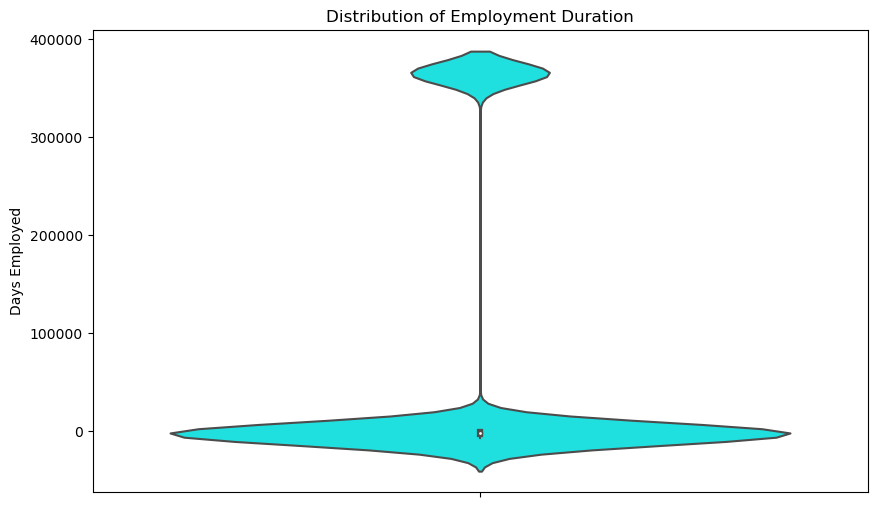

In [33]:
# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, y='DAYS_EMPLOYED', color='cyan')
plt.ylabel('Days Employed')
plt.title('Distribution of Employment Duration')
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

In [34]:
df['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

#### <font style="color:blue">ANALYSIS - 
<font style="color:blue"><p>The violin plot enables you to investigate the distribution of employment duration and explore whether longer employment is associated with lower payment difficulties. It offers a comprehensive view of the data distribution by combining a box plot with a probability density estimation, revealing the spread and central tendencies of employment durations within the dataset.
<br><p> In this dataset, it indicates that the mean employment duration is approximately 63,815 days, which is roughly 175 years. This seems unusual, as it suggests negative values that don't align with typical employment durations. The minimum and maximum values are also outliers.
<br><br>This analysis reveals some patterns where longer employment durations are associated with lower payment difficulties, which can be a valuable insight in credit risk assessment.

<h1 style="color:green"> Segmented Univariate Analysis

*For segmented analysis, the dataframe is segmented based on the target variable as mentioned above*<br>
`payment_difficulties_data` for '1' and `no_payment_difficulties_data` for '0'

<h3 style="color:purple"> Analysis of Clients with payment difficulties -- <i>Defaulters

<b>1.	Univariate Analysis for Clients with Payment Difficulties ('TARGET' = 1) with their OCCUPATION_TYPE.</b>
<br><br>
    A bar chart is created to visualize the distribution of clients with different occupations who have payment difficulties.

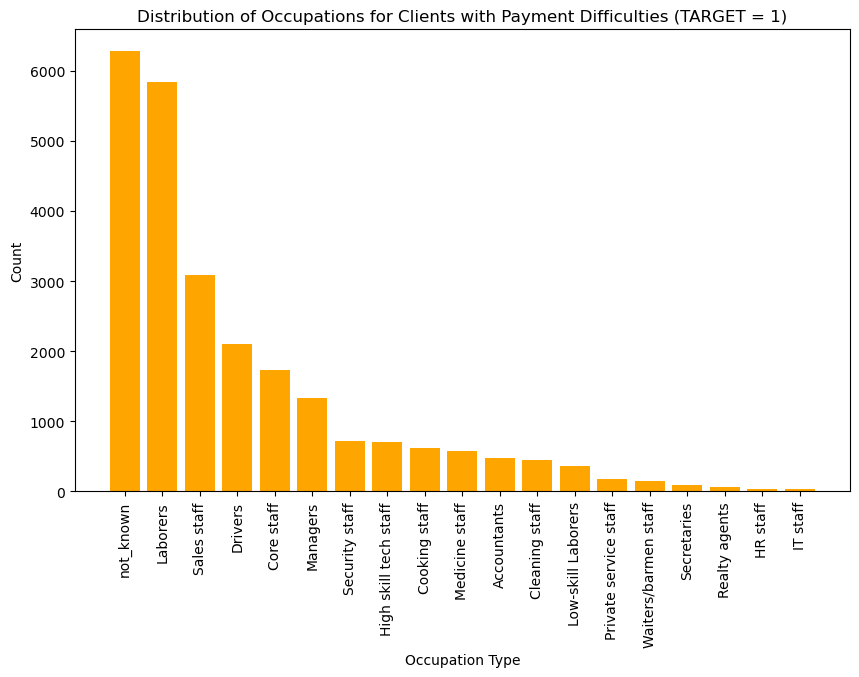

In [35]:
# Count the occurrences of each occupation type among clients with payment difficulties
occupation_counts = payment_difficulties_data['OCCUPATION_TYPE'].value_counts()

# Sort the values in descending order for better visualization
occupation_counts = occupation_counts.sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(occupation_counts.index, occupation_counts.values, color='orange')
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.title('Distribution of Occupations for Clients with Payment Difficulties (TARGET = 1)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

#### <font style="color:blue">ANALYSIS - 
<font style="color:blue">The graph indicates that individuals with an <b>unknown</b> occupation exhibit the highest defaulters when it comes to repaying loans. Following that, <b>laborers</b> and <b>sales staff</b> are the next groups with notable challenges in loan repayment.

<b>2.	Univariate Analysis for Clients with Payment Difficulties ('TARGET' = 1) with their Total Income -- 'AMT_INCOME_TOTAL'.</b>
<br><br>
    I create a histogram to visualize the income distribution for clients with payment difficulties.The histogram provides insights into the income distribution and allows you to check if higher income clients are less likely to have payment difficulties among clients with 'TARGET' = 1.

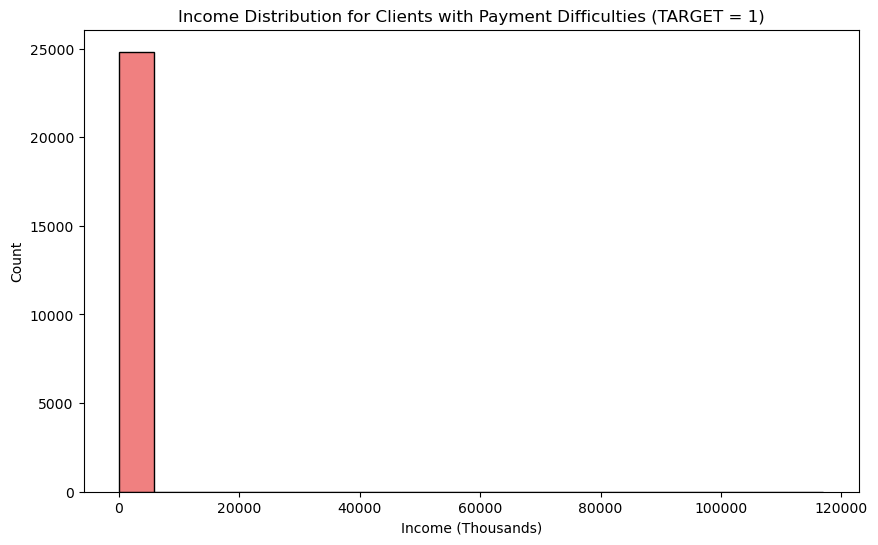

In [36]:
# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(payment_difficulties_data['AMT_INCOME_TOTAL'] / 1000, bins=20, color='lightcoral', edgecolor='black')
plt.xlabel('Income (Thousands)')
plt.ylabel('Count')
plt.title('Income Distribution for Clients with Payment Difficulties (TARGET = 1)')

# Show the plot
plt.show()

#### <font style="color:blue">ANALYSIS - 
<font style="color:blue">The data reveals a significant challenge in loan repayment for individuals with incomes lower than Rs. 2,000. Therefore, individuals with such low incomes should not be considered eligible for loans.

<b>3.	Univariate Analysis for Clients with Payment Difficulties ('TARGET' = 1) with the Annuity Amount -- 'AMT_ANNUITY'.</b>
<br><br>
    The 'AMT_ANNUITY' column represents the annuity amount for a client, which is the fixed installment paid by a borrower to a lender as part of a loan agreement. The relationship between 'AMT_ANNUITY' and 'payment_difficulties_data' can be analyzed to understand if the annuity amount has an impact on payment difficulties. A box plot can help you assess the distribution of the same.

Text(0.5, 1.0, 'Annuity Amount Distribution for Clients with Payment Difficulties (TARGET = 1)')

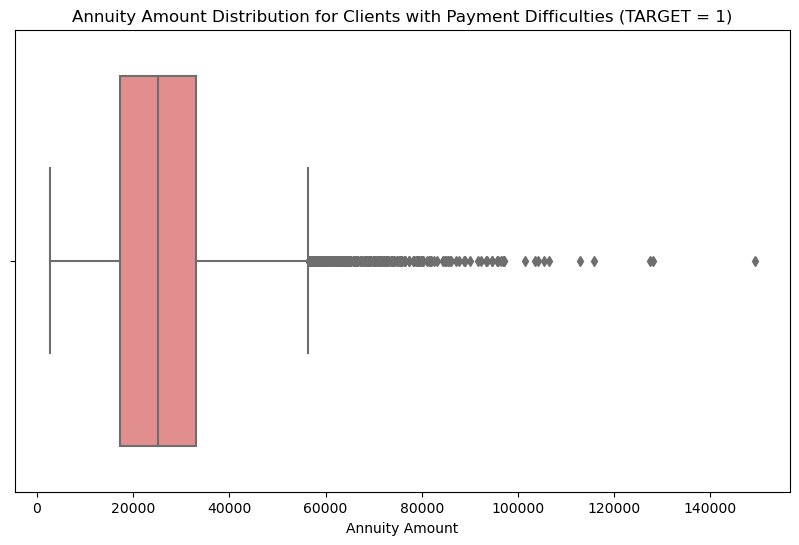

In [37]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=payment_difficulties_data, x='AMT_ANNUITY', color='lightcoral')
plt.xlabel('Annuity Amount')
plt.title('Annuity Amount Distribution for Clients with Payment Difficulties (TARGET = 1)')


In [38]:
payment_difficulties_data['AMT_ANNUITY'].describe()

count     24825.000000
mean      26481.744290
std       12450.676999
min        2722.500000
25%       17361.000000
50%       25263.000000
75%       32976.000000
max      149211.000000
Name: AMT_ANNUITY, dtype: float64

#### <font style="color:blue">ANALYSIS - 
<font style="color:blue">
  <ul>  <li>	Clients with payment difficulties have annuity amounts that are <b> centered </b> around the mean and median values, and the <b>variability in annuity amounts</b> is lower compared to the group without payment difficulties.<br>
 <li> The presence of some <b>outliers</b> with higher annuity amounts may suggest that while clients in this group may have payment difficulties, some of them still have <b>relatively high incomes.</b>

<li>The <b>narrower IQR</b> indicates that there is a more consistent range of annuity amounts within the group of clients with payment difficulties.
<li>In summary, the data suggests that clients with payment difficulties have annuity amounts that are <b>relatively consistent,</b> but there are still some outliers with higher annuity amounts. When assessing credit risk within this group, other factors such as the <i>nature and severity of their payment difficulties, credit history, and financial stability</i> should also be taken into account to make a comprehensive evaluation of their creditworthiness.
  </ul>

<h3 style="color:purple"> Analysis of Clients with No Payment difficulties 

<b>1.	Univariate Analysis for Clients with No Payment Difficulties ('TARGET' = 0) with their OCCUPATION_TYPE.</b>
<br>
<p>This bar chart will help the lenders determine if there are different occupational distributions for clients with 'TARGET' = 0 and provide insights into the types of occupations associated with no payment difficulties.


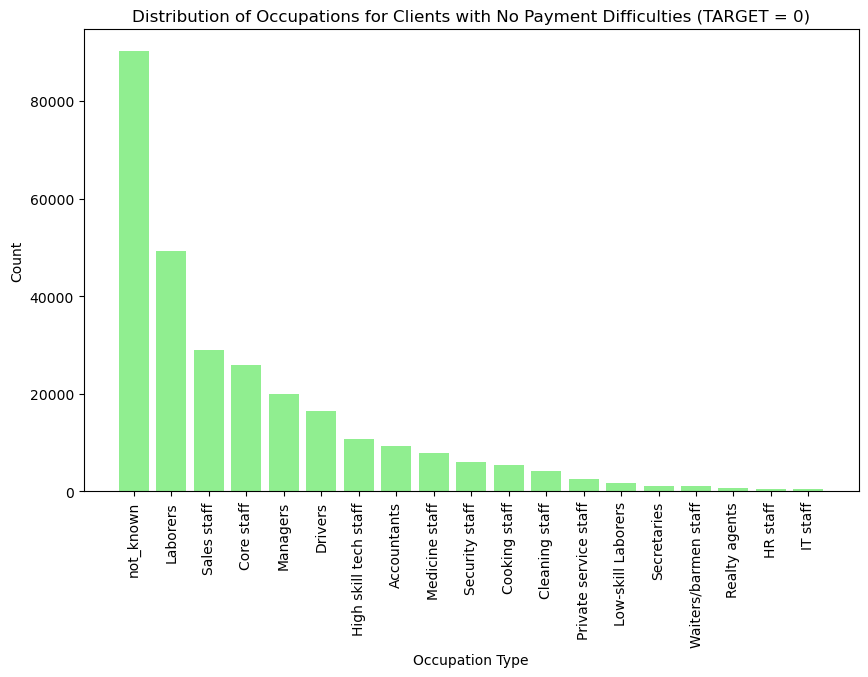

In [39]:
# Count the occurrences of each occupation type among clients with no payment difficulties
occupation_counts = no_payment_difficulties_data['OCCUPATION_TYPE'].value_counts()

# Sort the values in descending order for better visualization
occupation_counts = occupation_counts.sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(occupation_counts.index, occupation_counts.values, color='lightgreen')
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.title('Distribution of Occupations for Clients with No Payment Difficulties (TARGET = 0)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

#### <font style="color:blue">ANALYSIS - 
<font style="color:blue">The graph shows that a significant number of individuals with an <b>'unknown'</b> occupation face no difficulty in repaying their loans. Following them are <b>laborers</b> and <b>sales staff</b>, who also exhibit a low incidence of payment difficulties.

<b>2.	Univariate Analysis for Clients with No Payment Difficulties ('TARGET' = 0) with their Total Income -- 'AMT_INCOME_TOTAL’:</b>
<br>
To Analyze the income distribution for clients with no payment difficulties.<br>
and investigate if there are differences in income distribution for clients with 'TARGET' = 0.<br>


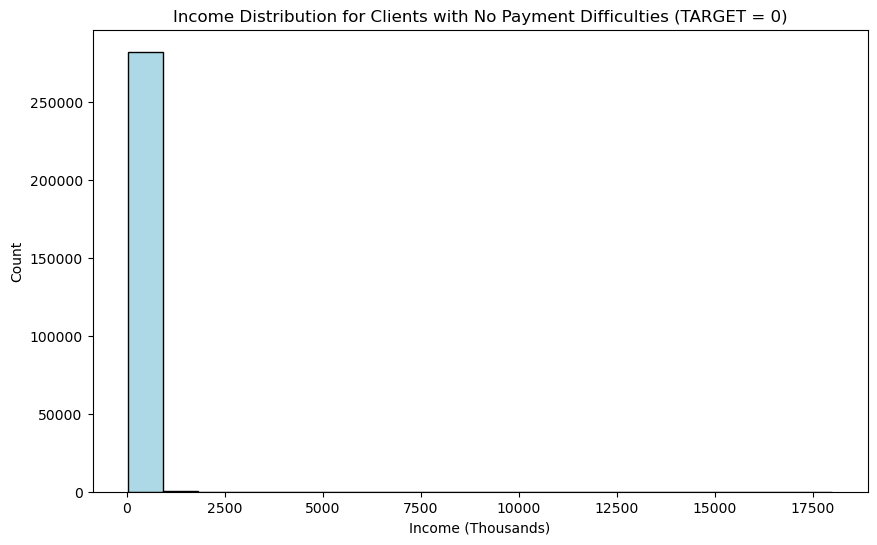

In [40]:
# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(no_payment_difficulties_data['AMT_INCOME_TOTAL'] / 1000, bins=20, color='lightblue', edgecolor='black')
plt.xlabel('Income (Thousands)')
plt.ylabel('Count')
plt.title('Income Distribution for Clients with No Payment Difficulties (TARGET = 0)')

# Show the plot
plt.show()

#### <font style="color:blue">ANALYSIS - 
<font style="color:blue">The graph indicates that there is an equal income distribution among clients who are required to repay their loans.

<b>3.	Univariate Analysis for Clients with No Payment Difficulties ('TARGET' = 1) with the Annuity Amount -- 'AMT_ANNUITY'.</b>
<br><br>
    The relationship between 'AMT_ANNUITY' and 'payment_difficulties_data' can be analyzed to understand if the annuity amount has an impact on payment difficulties. A box plot can help to assess the distribution of the same.

Text(0.5, 1.0, 'Annuity Amount Distribution for Clients with No Payment Difficulties (TARGET = 0)')

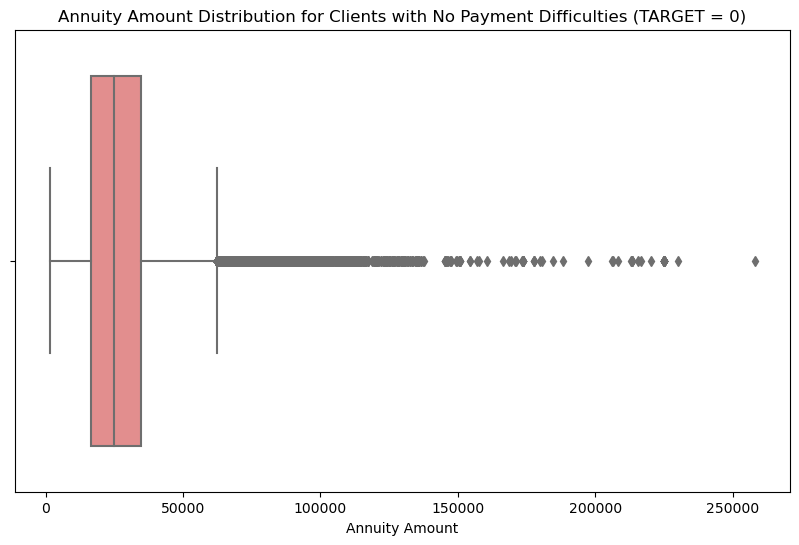

In [41]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=no_payment_difficulties_data, x='AMT_ANNUITY', color='lightcoral')
plt.xlabel('Annuity Amount')
plt.title('Annuity Amount Distribution for Clients with No Payment Difficulties (TARGET = 0)')


In [42]:
no_payment_difficulties_data['AMT_ANNUITY'].describe()

count    282674.000000
mean      27163.623349
std       14658.307178
min        1615.500000
25%       16456.500000
50%       24876.000000
75%       34749.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

#### <font style="color:blue">ANALYSIS - 
<font style="color:blue">
    <ul><li>Clients with no payment difficulties generally have annuity amounts that are <b>centered</b> around the mean and median values, with a significant number falling within the IQR.

<li>The presence of outliers with very high annuity amounts suggests that some clients may have significantly higher income levels, which could be a <b>positive factor</b> in assessing creditworthiness.

<li>However, the wide variability in annuity amounts indicates that some clients with no payment difficulties may still have relatively low incomes, and this could impact their ability to manage future financial obligations.
<li> In summary, while the data suggests that clients with no payment difficulties tend to have annuity amounts <b>distributed</b> around the mean, the presence of <i>outliers and variability within the data</i> emphasizes the need for a more comprehensive credit risk assessment that considers other factors such as credit history, employment stability, and overall financial health.</ol>

<h1 style="color:green"> Bivariate Analysis

#### 1.	NAME_CONTRACT_TYPE vs. AMT_INCOME_TOTAL: 
To visually explore the relationship between the type of loan contract and the income levels of clients. The boxplot provides insights into the distribution of income levels among clients with different contract types.

<Figure size 1000x600 with 0 Axes>

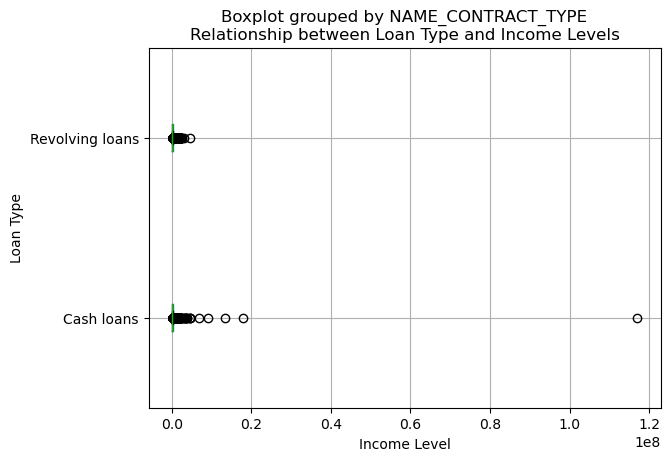

In [43]:
# Create a box plot to examine the relationship between loan type and income levels
plt.figure(figsize=(10, 6))  # Set the figure size

# Create the box plot
ax = df.boxplot(column='AMT_INCOME_TOTAL', by='NAME_CONTRACT_TYPE', vert=False)

# Set labels and title
plt.xlabel('Income Level')
plt.ylabel('Loan Type')
plt.title('Relationship between Loan Type and Income Levels')

# Show the plot
plt.show()

#### <font style="color:blue">ANALYSIS - 
<font style="color:blue">
 <ul>
<li>In the graph above, it's evident that the "Cash loans" category shows a higher frequency of clients with exceptionally high or low incomes compared to "Revolving loans."
  <li>In the above graph, there is greater overlap among data points in the "Cash loans" category compared to the "Revolving loan" category, indicating that income levels are more similar across different contract types for the former.
 <li><b> Considering the overall shape of the boxplots and the distribution of income levels in the graph, it appears that the "Cash loans" category exhibits a higher incidence of clients with exceptionally high or low incomes compared to "Revolving loans." </ul>

####  2.	OCCUPATION_TYPE vs. AMT_CREDIT: 
To visualise how occupation influences the credit amount granted to clients of different professions. The bar heights represent the average credit amount for each occupation type, allowing the lenders to compare the influence of occupation on credit amounts.


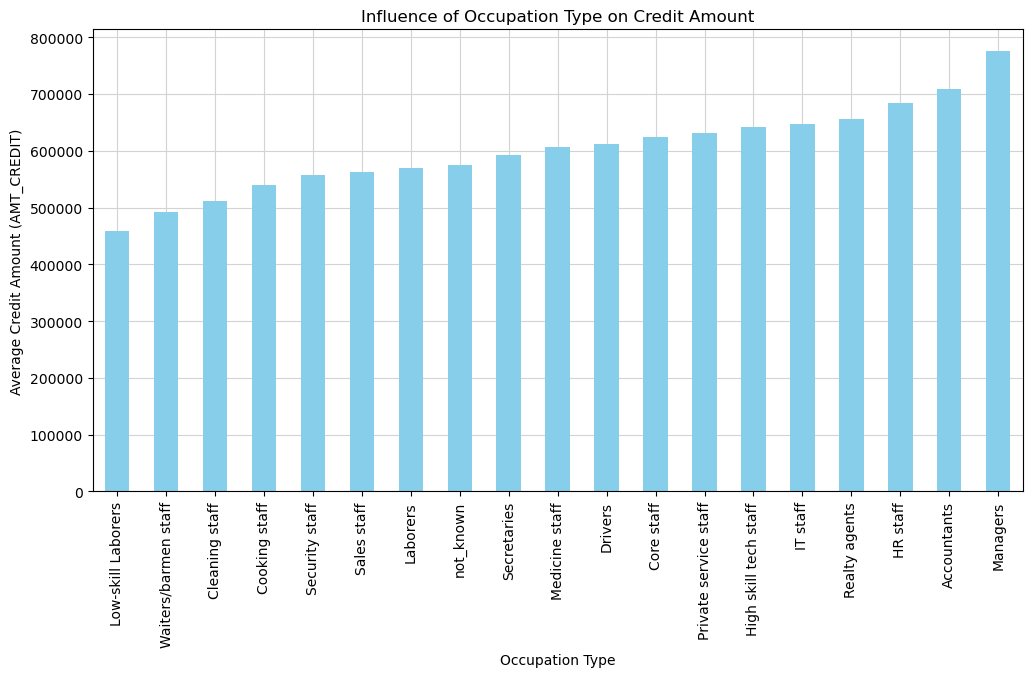

In [44]:
# Create a bar plot to examine the relationship between occupation and credit amount
plt.figure(figsize=(12, 6))  # Set the figure size

# Create the bar plot
df_grouped = df.groupby('OCCUPATION_TYPE')['AMT_CREDIT'].mean().sort_values()
ax= df_grouped.plot(kind='bar', color='skyblue')

# Add grid lines to the plot
ax.set_axisbelow(True)
ax.grid(color='lightgray', linestyle='solid')

# Set labels and title
plt.xlabel('Occupation Type')
plt.ylabel('Average Credit Amount (AMT_CREDIT)')
plt.title('Influence of Occupation Type on Credit Amount')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

#### <font style="color:blue">ANALYSIS - 
<font style="color:blue">
By examining the plot, we can identify trends and differences in credit amounts across various professions. It provides insights into how lenders assess credit risk and determine the loan amount based on the applicant's occupation. <br>

As seen in the graph, high-income occupations are associated with larger credit amounts, while others have more modest loan approvals.
<br>
    
In summary, the analysis of "OCCUPATION_TYPE" in relation to "AMT_CREDIT" sheds light on the influence of a person's occupation on the credit amount they are granted. It will help to understand the lending practices of financial institutions and how they can assess risk and determine loan amounts for different occupational groups.

#### 3.	NAME_FAMILY_STATUS vs. AMT_CREDIT: 
To examine the relationship between family status and credit amounts granted to individuals. It aims to understand how family status influences the credit amounts individuals receive.

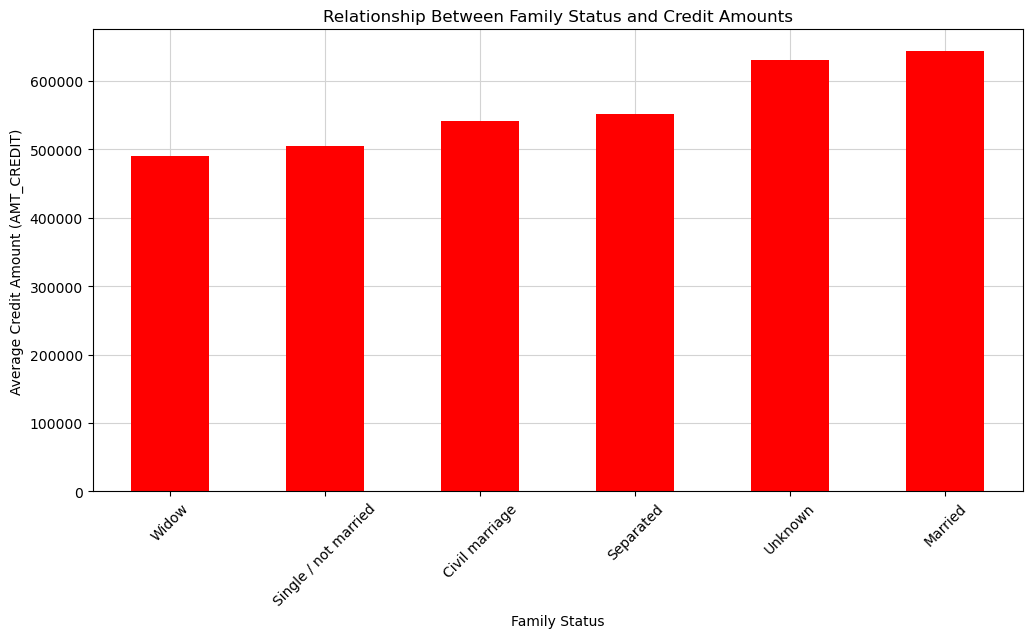

In [45]:
# Create a bar plot to study the relationship between family status and credit amounts
plt.figure(figsize=(12, 6))  # Set the figure size

# Create the bar plot
df_grouped = df.groupby('NAME_FAMILY_STATUS')['AMT_CREDIT'].mean().sort_values()
bx=df_grouped.plot(kind='bar', color='red')

# Add grid lines to the plot
bx.set_axisbelow(True)
bx.grid(color='lightgray', linestyle='solid')

# Set labels and title
plt.xlabel('Family Status')
plt.ylabel('Average Credit Amount (AMT_CREDIT)')
plt.title('Relationship Between Family Status and Credit Amounts')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


#### <font style="color:blue">ANALYSIS - 
<font style="color:blue">It provides valuable insights into the relationship between family status and the credit amounts granted to loan applicants.Family status provides insights into an applicant's financial stability and potential ability to meet repayment obligations.
    <p> When assessing the spread of credit amounts within each family status category, **Separated** and **Civil Marriage** categories exhibit comparable spreads, while Single individuals receive credit amounts with a narrower spread. 
    <p> When examining credit amounts across various family statuses, a pattern emerges where **Married** individuals tend to receive the highest credit amounts, followed by those with an **unknown family status**. **Separated and Civil Marriage** categories exhibit similar credit amounts, while **Single** individuals receive lower credit amounts. **Widowed** individuals tend to receive the lowest credit amounts among the family status groups.

#### 4.	NAME_INCOME_TYPE vs. AMT_CREDIT:
To explore how different income sources are related to credit amounts.To visualize the relationship between income sources and the credit amounts granted to individuals. The goal is to understand how various income types are related to credit amounts.

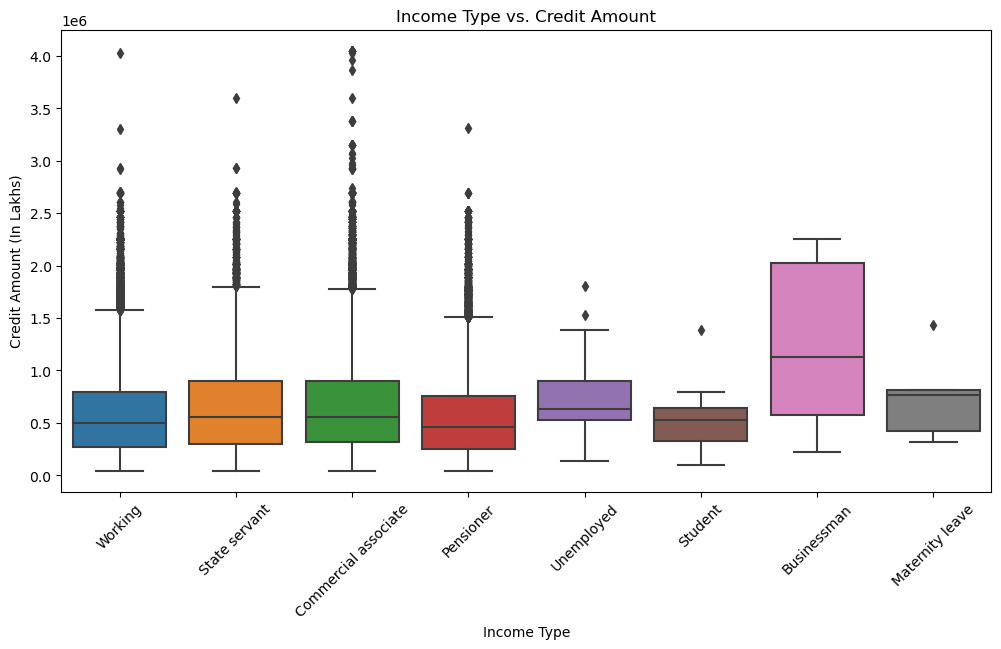

In [46]:
# Create a Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='NAME_INCOME_TYPE', y='AMT_CREDIT', data=df)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Set labels and title
plt.title('Income Type vs. Credit Amount')
plt.xlabel('Income Type')
plt.ylabel('Credit Amount (In Lakhs)')

# Show the plot
plt.show()

#### <font style="color:blue">ANALYSIS - 
<font style="color:blue">According to the analysis of the Box plot, it is evident that Businessmen tend to secure the highest credit amounts, while Students tend to obtain the lowest credit amounts.<p> There are numerous outliers in the income categories of Commercial associate, followed by Working, Pensioner, and State servant. These outliers may represent exceptional cases where individuals within these income sources receive either exceptionally high or low credit amounts.

<h1 style="color:green"> Multivariate Correlation Analysis

### Correlation Analysis for Clients with Payment Difficulties ('TARGET' = 1) -- <i>Defaulters</i>

Examine the connections between variables that pertain to clients experiencing payment difficulties. These columns are stored in a variable named ***cont_cols***, and a heatmap is employed for visualization.This correlation matrix and heatmap will help to identify relationships between variables specific to ***Defaulters*** and provide insights into how these variables are related to each other within this subgroup.



- **AMT_INCOME_TOTAL**: To see how income is correlated with other numerical variables, like credit amount or annuity.
- **AMT_CREDIT**: To analyze the correlation between credit amount and other financial variables.
- **AMT_ANNUITY:** To analyze the correlation with installment amount between income with the goods price.
- **AMT_GOODS_PRICE:**  To analyze the goods price between credit amount and other financial variables.
- **DAYS_BIRTH:** To explore how age is correlated with credit risk.
- **DAYS_EMPLOYED:** To assess the correlation between employment duration and loan approval.
- **REGION_POPULATION_RELATIVE:** To investigate the relationship between the population of the region and credit risk.


In [47]:
cont_cols

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'REGION_POPULATION_RELATIVE']

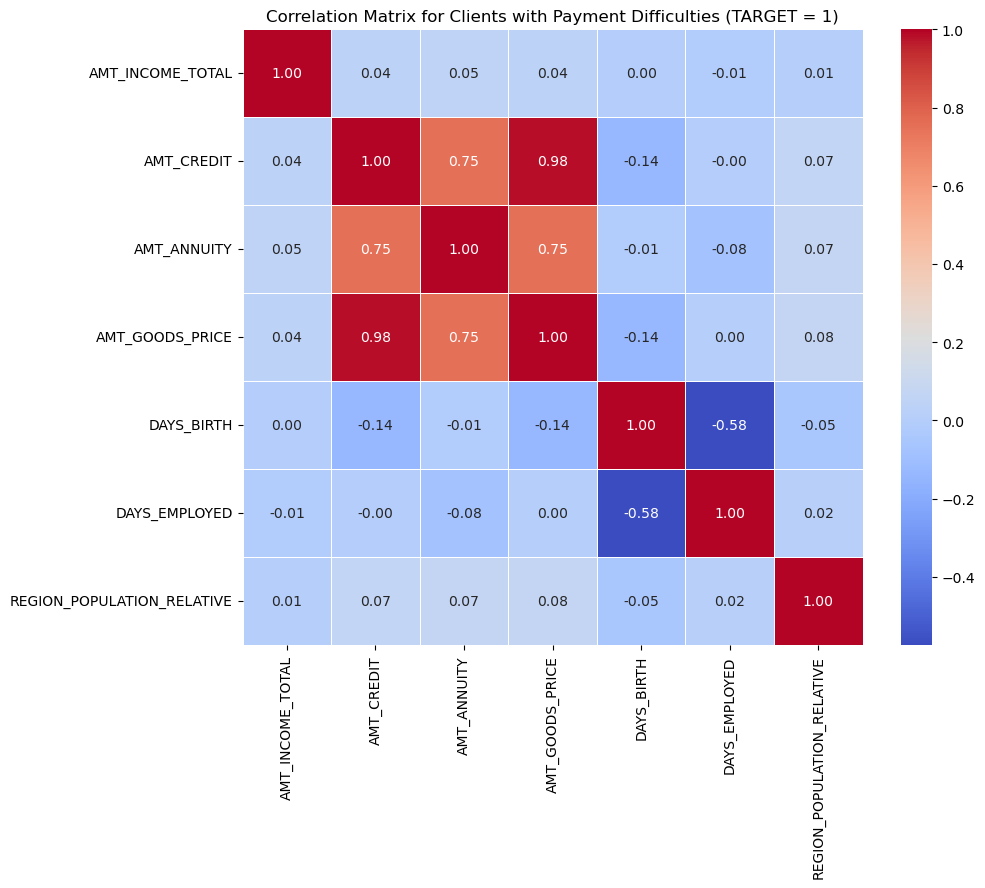

In [48]:
# Calculate the correlation matrix
correlation_matrix = payment_difficulties_data[cont_cols].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Clients with Payment Difficulties (TARGET = 1)')
plt.show()

#### <span style="color:blue"> ANALYSIS:

- <span style="color:blue">**AMT_INCOME_TOTAL:**
    - <span style="color:green">With AMT_ANNUITY and AMT_GOODS_PRICE, these correlations are relatively weak, indicating that income is slightly positively related to annuity and the price of goods for the loan. 
    - <span style="color:green">With REGION_POPULATION_RELATIVE , indicating a slight positive association between income and the relative population density of the region.</span>
- <span style="color:blue">**AMT_CREDIT**: 
    - <span style="color:green">With AMT_ANNUITY and AMT_GOODS_PRICE - This suggests a strong positive relationship between the credit amount and both the annuity and the price of goods.
    - <span style="color:red">With DAYS_BIRTH - The negative correlation implies that younger individuals tend to secure higher credit amounts.
- <span style="color:blue">**AMT_ANNUITY**:
    - <span style="color:green">With AMT_CREDIT and AMT_GOODS_PRICE - This indicates that annuity amounts are strongly associated with credit amounts and borrower income levels.
    - <span style="color:red">With DAYS_EMPLOYED - This suggests that longer employment gaps or unstable employment histories may lead to lower annuity amounts.
- <span style="color:blue">**AMT_GOODS_PRICE:** 
    - <span style="color:green">With AMT_CREDIT - This suggests a strong positive relationship between the price of goods and the credit amount. 
    - <span style="color:green">With REGION_POPULATION_RELATIVE - This indicates a positive association between the price of goods and the relative population density of the region.
- <span style="color:blue">**DAYS_BIRTH:** 
    - <span style="color:red">With AMT_CREDIT and AMT_GOODS_PRICE - These negative correlations suggest that younger individuals tend to secure higher credit amounts and request loans for less expensive goods.
- <span style="color:blue">**DAYS_EMPLOYED:** 
    - <span style="color:red"> With AMT_ANNUITY - This suggests that longer employment gaps or unstable employment histories may lead to lower annuity amounts.
    - <span style="color:green">With REGION_POPULATION_RELATIVE - This indicates a slight positive association between employment history and the relative population density of the region.
- <span style="color:blue">**REGION_POPULATION_RELATIVE:** 
    -<span style="color:green"> With AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, and AMT_GOODS_PRICE - These correlations suggest that as the population density of a region increases, there is a slight tendency for higher income levels, higher credit amounts, higher annuity payments, and more expensive goods for which loans are requested. This may indicate that regions with higher population density are associated with slightly improved financial metrics, but the associations are relatively weak.

### Correlation Analysis for Clients with No Payment Difficulties ('TARGET' = 0)

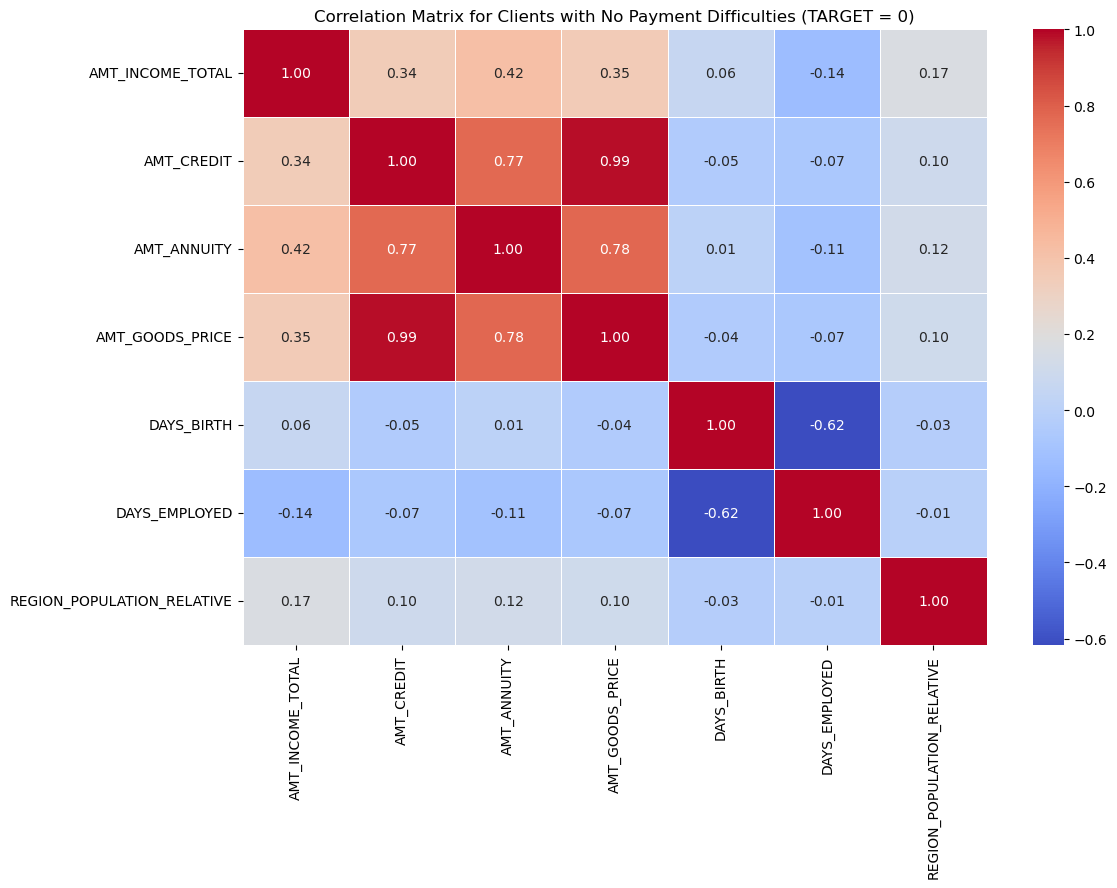

In [49]:
# Calculate the correlation matrix
correlation_matrix = no_payment_difficulties_data[cont_cols].corr()

# Create a heatmap for visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Clients with No Payment Difficulties (TARGET = 0)')

# Show the heatmap
plt.show()

#### <font style="color:blue">ANALYSIS - 

- <span style="color:blue">**AMT_INCOME_TOTAL**
 :<span style="color:green">With AMT_ANNUITY, AMT_GOODS_PRICE, and AMT_CREDIT - This indicates that individuals with higher incomes tend to secure higher credit amounts, pay higher annuities, and request loans for more expensive goods.
- <span style="color:blue">**AMT_CREDIT**
 :  
    - <span style="color:green"> With AMT_ANNUITY and AMT_GOODS_PRICE - This indicates that credit amounts are strongly correlated with the annuity to be paid and the price of goods.
    - <span style="color:red"> With DAYS_BIRTH - The negative correlation implies that younger individuals tend to secure higher credit amounts.
- <span style="color:blue">**AMT_ANNUITY**
 :
    - <span style="color:green"> With AMT_CREDIT and AMT_GOODS_PRICE - This indicates a strong positive relationship between the annuity and both the credit amount and the price of goods.
    - <span style="color:red"> With DAYS_EMPLOYED - This suggests that longer employment gaps or unstable employment histories may lead to lower annuity amounts.
- <span style="color:blue">**AMT_GOODS_PRICE**
 :<span style="color:green">With AMT_CREDIT - This suggests a strong positive relationship between the price of goods and the credit amount.
- <span style="color:blue">**DAYS_BIRTH**
 :
    - <span style="color:green">With AMT_INCOME_TOTAL - This suggests that older individuals tend to have slightly higher incomes.
    - <span style="color:red">With AMT_CREDIT and AMT_GOODS_PRICE - The negative correlations indicate that younger individuals tend to secure higher credit amounts and request loans for less expensive goods.

- <span style="color:blue">**DAYS_EMPLOYED**
 : <span style="color:red">With AMT_INCOME_TOTAL , AMT_ANNUITY , and REGION_POPULATION_RELATIVE - This indicates that individuals with longer employment gaps or unstable employment histories tend to have lower incomes, lower annuity amounts, and may reside in regions with lower population density.

- <span style="color:blue">**REGION_POPULATION_RELATIVE**
 : <span style="color:green">With AMT_INCOME_TOTAL, AMT_ANNUITY, and AMT_CREDIT - This suggests that individuals living in regions with higher population density tend to have higher incomes, higher annuity amounts, and are granted higher credit amounts.

## Part 2: Previous Applications' Data Analysis for a Loan eligibility

This dataset can prove valuable for individuals with a target value of 0, suggesting they might be capable of making timely payments based on their past application history, thereby making them suitable candidates for loan approval by the lenders.

### Reading and Inspection

**Import and read**

Import and read the `previous_application.csv` database. Store it in a variable called `df2`.

In [50]:
df2=pd.read_csv('previous_application.csv')

In [51]:
df2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
df2.shape

(1670214, 37)

In [53]:
df2.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### Impute/Remove Missing values

In [54]:
# Find the percentage of null values in each column of a pandas dataframe df2
100 * df2.isnull().mean()

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [55]:
# Checking for columns having null value percentage more than 40 and storing it
# in a variable named 'cols_to_drop'

cols_to_drop = df2.columns[100 * df2.isnull().mean() > 40]

In [56]:
cols_to_drop

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [57]:
# These columns are advised to drop from the dataframe for better analysis.

df2= df2.drop(cols_to_drop, axis = 1)

In [58]:
df2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [59]:
df2.shape

(1670214, 26)

In [60]:
# Finding the remaining null values and sorting them to know the highest percentage column

# Set the maximum number of rows to be displayed to None, which means that all rows will be displayed
pd.options.display.max_rows = None 

(100 * df2.isnull().mean()).sort_values(ascending=False)

AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
CODE_REJECT_REASON              0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
SK_ID_PREV                      0.000000
NAME_PAYMENT_TYPE               0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TY

In [61]:
# Find the number of columns still having null values
len(df2.columns[100 * df2.isnull().mean()>0])

5

The five remaining columns with null values can be ignored since the null values are minimal, and they won't significantly impact the analysis.

In [62]:
#To get the number of distinct elements in each column.
df2.nunique()

SK_ID_PREV                     1670214
SK_ID_CURR                      338857
NAME_CONTRACT_TYPE                   4
AMT_ANNUITY                     357959
AMT_APPLICATION                  93885
AMT_CREDIT                       86803
AMT_GOODS_PRICE                  93885
WEEKDAY_APPR_PROCESS_START           7
HOUR_APPR_PROCESS_START             24
FLAG_LAST_APPL_PER_CONTRACT          2
NFLAG_LAST_APPL_IN_DAY               2
NAME_CASH_LOAN_PURPOSE              25
NAME_CONTRACT_STATUS                 4
DAYS_DECISION                     2922
NAME_PAYMENT_TYPE                    4
CODE_REJECT_REASON                   9
NAME_CLIENT_TYPE                     4
NAME_GOODS_CATEGORY                 28
NAME_PORTFOLIO                       5
NAME_PRODUCT_TYPE                    3
CHANNEL_TYPE                         8
SELLERPLACE_AREA                  2097
NAME_SELLER_INDUSTRY                11
CNT_PAYMENT                         49
NAME_YIELD_GROUP                     5
PRODUCT_COMBINATION      

In [63]:
#This method returns a DataFrame containing summary statistics of the DataFrame.
#By default, it only includes numeric columns and provides the following statistics for each column.
df2.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,1.284699e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.297984e+06
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,2.278473e+05,1.248418e+01,9.964675e-01,-8.806797e+02,3.139511e+02,1.605408e+01
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,3.153966e+05,3.334028e+00,5.932963e-02,7.790997e+02,7.127443e+03,1.456729e+01
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000e+00
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,5.084100e+04,1.000000e+01,1.000000e+00,-1.300000e+03,-1.000000e+00,6.000000e+00
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05,1.200000e+01,1.000000e+00,-5.810000e+02,3.000000e+00,1.200000e+01
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,2.340000e+05,1.500000e+01,1.000000e+00,-2.800000e+02,8.200000e+01,2.400000e+01
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06,8.400000e+01


<h1 style="color:green"> Univariate Analysis

<b> 1. NAME_CONTRACT_STATUS (Categorical):</b><br>
To visualize the distribution of previous loan statuses.
Assess whether clients with previous approved loans are less likely to face payment difficulties.

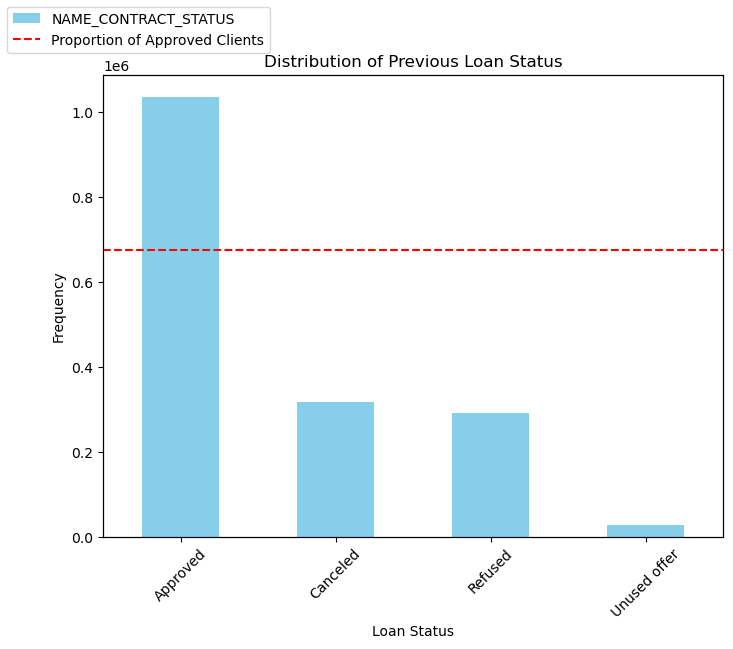

Proportion of clients with 'Approved' loans: 62.07%


In [64]:
# Create a bar plot for 'NAME_CONTRACT_STATUS'
fig, ax1 = plt.subplots(figsize=(8, 6))
df2['NAME_CONTRACT_STATUS'].value_counts().plot(kind='bar', color='skyblue', ax=ax1)
ax1.set_title('Distribution of Previous Loan Status')
ax1.set_xlabel('Loan Status')
ax1.set_ylabel('Frequency')
ax1.tick_params(axis='x', rotation=45)

# Calculate the proportion of clients with "Approved" loans
total_clients = len(df2)
approved_clients = len(df2[df2['NAME_CONTRACT_STATUS'] == 'Approved'])
approved_proportion = approved_clients / total_clients

# Create a secondary y-axis for better readability
ax2 = ax1.twinx()
ax2.axhline(y=approved_proportion, color='red', linestyle='--', label='Proportion of Approved Clients')
ax2.set_yticks([])  # Hide y-axis ticks on the right

# Add legend
fig.legend(loc="upper left")

plt.show()

# Analyze the insight
print(f"Proportion of clients with 'Approved' loans: {approved_proportion:.2%}")


#### <font style="color:blue">ANALYSIS - 
<font style="color:blue">The insight derived from the analysis is that a substantial proportion of clients have "Approved" loans, which suggests that many clients in the dataset have successfully secured loans, possibly indicating a higher likelihood of them not facing payment difficulties. This insight can inform further analysis and decision-making related to credit risk.

<b> 2. AMT_ANNUITY (Numerical):</b><br>
To analyze the annuity payment distribution for previous loans.

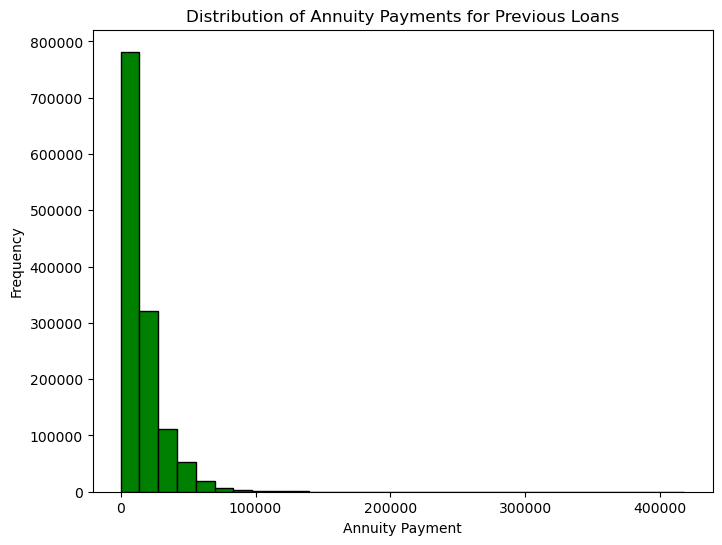

In [65]:
# Create a histogram for 'AMT_ANNUITY'
plt.figure(figsize=(8, 6))
plt.hist(df2['AMT_ANNUITY'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of Annuity Payments for Previous Loans')
plt.xlabel('Annuity Payment')
plt.ylabel('Frequency')

# Show the graph
plt.show()


#### <font style="color:blue">ANALYSIS - 
<font style="color:blue">The annuity payment distribution reveals distinct peaks, with the highest frequency observed at 780,000, followed by a secondary peak at around 320,000, another peak near 120,000, and a final peak at approximately 50,000. These peaks and clusters in the distribution provide valuable insights into annuity payment patterns, suggesting that certain payment amounts are more common or have higher frequencies compared to others.